In [1]:
# import necessary packages
from plotnine import *
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


# Together

Let's build a few graphs together!

- show how high blood pressure and age are related
- what is the distribution of platelet counts?
- how many of our participants have a serum sodium > 130?

In [2]:
# data from: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart_failure_clinical_records_dataset.csv")

heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


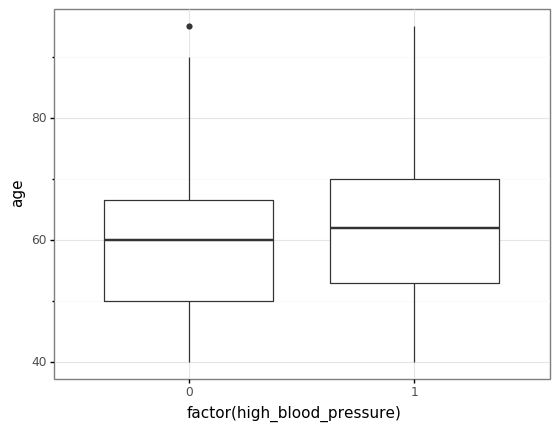

<ggplot: (8775715243764)>

In [3]:
(ggplot(heart, aes(x = "factor(high_blood_pressure)", y = "age")) + geom_boxplot() + theme_bw())

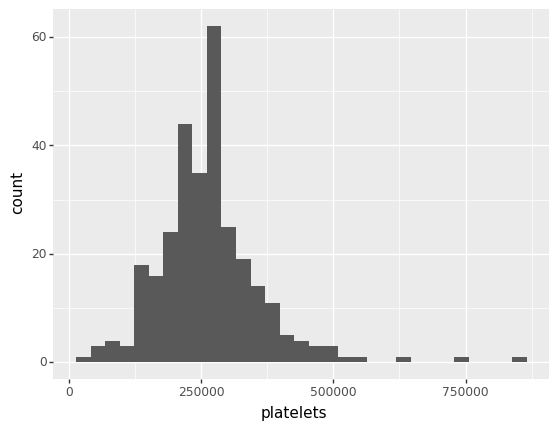

<ggplot: (8775715247526)>

In [4]:
ggplot(heart, aes("platelets")) + geom_histogram() + geom_vline(xintercept = 130)

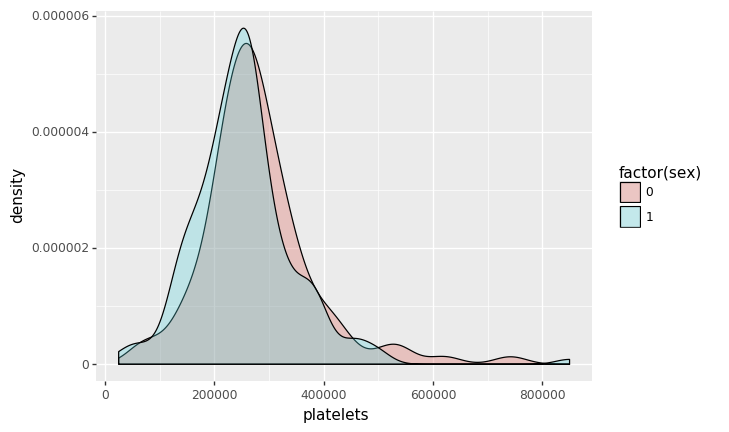

<ggplot: (8775717085200)>

In [21]:
ggplot(heart, aes("platelets", group = "sex", fill = "factor(sex)")) + geom_density(alpha = 0.3)

In [11]:
ggplot(heart, aes("serum_sodium")) + geom_histogram() + geom_vline(xintercept = 130, linetype = "dashed" )


0.9264214046822743


In [12]:
print(sum(heart["serum_sodium"] > 130)/heart.shape[0])

0.9264214046822743


# In Your Groups
1. Load the necessary libraries (pandas, plotnine)

2. Load the following dataset `Fifa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/players_15.csv")`. For more info check out [this link.](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset/version/1#)

3. How old is the average player in FIFA20? Use plotnine/ggplot to plot a histogram of their ages.

4. Do right footed players weigh more than left footed players? Use ggplot/plotnine to make a graph to answer this question.

5. Is there a difference in height between the clubs Chelsea and Manchester United? Use ggplot/plotnine to make a graph to answer this question.

6. Is there a difference in the relationship between height and weight for people born in each of the 12 months? Use ggplot/plotnine to make a graph to answer this question. (see code below on how to extract the month from the column `fifa[dob]`) 

7. Is there an averaged difference between players with different `body_type`s? Use ggplot/plotnine to make a graph to answer this question. Discuss what kind of plot would best communicate this information in your opinion.

8. Calculate a new column `bmi` for the fifa dataset. The formula for BMI is below. Note: Body Mass Index (BMI) is not a universal metric of health, and should NOT be taken as such. Use ggplot/plotnine to plot a histogram of the different BMIs in the dataset. Add a dashed line using `+ geom_vline(xintercept = mean, linetype = "dashed", size = 3)` where mean is the mean BMI for the whole dataset.

$$ BMI = \frac{weight(kg)}{height(m)^2}$$

9. What is the relationship between height and weight for each `body_type`? Use `facet_wrap()` to make a separate height/weight scatterplot for each body type.

10. Is there an association between jersey number and age?  Use ggplot/plotnine to make a graph to answer this question.

11. Let's use your CPSC230 skills, create a column in `fifa` called `name_len` that counts the number of characters in each player's `long_name` (spaces shouldn't count). Then use ggplot/plotnine to create a histogram of `name_len` and add `+theme_minimal()` to your graph. What is the typical range of name length?
 

In [3]:
### YOUR CODE HERE ###
fifa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/players_15.csv")

# get month of date of birth
fifa["monthBorn"] = fifa["dob"].str.extract(r'-([0-9][0-9])-')
